# Inaugural Project

> **Note the following:** 
> 1. This is an example of how to structure your **inaugural project**.
> 1. Remember the general advice on structuring and commenting your code from [lecture 5](https://numeconcopenhagen.netlify.com/lectures/Workflow_and_debugging).
> 1. Remember this [guide](https://www.markdownguide.org/basic-syntax/) on markdown and (a bit of) latex.
> 1. Turn on automatic numbering by clicking on the small icon on top of the table of contents in the left sidebar.
> 1. The `inauguralproject.py` file includes a function which can be used multiple times in this notebook.

Imports and set magics:

In [116]:
import numpy as np

# autoreload modules when code is run
%load_ext autoreload
%autoreload 2

# local modules
import inauguralproject

# standard imports
from types import SimpleNamespace # new? explained below
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Question 1

The intiutive way to solve this model remains identical with the method applied when using pen and paper. Hence, this was the most helpful approah to solving this problem:
1. Defined the parameters
2. Define the model (aa stated with modifications such that eq. (2) and (4) are combined
3. Setup maximization problem
4. Solve
5. Display solution

In [147]:
# Define parameters:
par = SimpleNamespace()
par.phi = 0.3
par.eta = 0.5
par.r   = 0.03
par.tg  = 0.012
par.tp  = 0.004
par.ph  = 3.0
par.m   = 0.5
par.eta_reform = 0.8
par.tg_reform  = 0.01
par.tp_reform  = 0.009
par.ph_reform  = 8.0

# Define Model
def utility(c, h, par):
    return c**(1-par.phi)*h**par.phi

#Combined eq. (2) and (4)
def budget(h, par):
    return par.r*h+par.tg*h*par.eta+par.tp*max(h*par.eta-par.ph,0)

def objective(h, par): 
    c=par.m-budget(h, par)
    return -utility(c, h, par)

# Solve
def solver(par):   
    res = optimize.minimize_scalar(objective,args=(par),bounds=None)
    
# Save solution for h and insert in consumption (which is also saved)
    h_star = res.x
    c_star = par.m-budget(h_star, par)
    return c_star, h_star

#Call the solved function to display the final result
solver(par)


(0.35000000225770106, 4.1666666039527485)

In [123]:
# Question 2

In this assignment, I add introduce vectors for both c and h, such that I can plot the optimal combination for different levels of m. 

The result is shown below. 

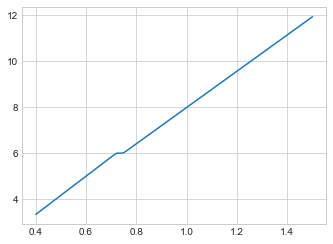

In [127]:
#Creating the figure
fig = plt.figure(figsize=(12,4))

N = 100
m_vec = np.linspace(0.4,1.5,N)
h_vec = np.zeros(N)
c_vec = np.zeros(N)

#Unpack solutions
for i,m in enumerate(m_vec):
    par.m = m
    c,h=solver(par)
    h_vec[i] = h
    c_vec[i] = c

ax = fig.add_subplot(1,2,1)
ax.plot(m_vec,h_vec)



# Question 3

In this assignment I have tried solving the problem as follows:

1. Setting the seed
2. Define the population of N=10.000 consisting of random numbers drawn from the log-normal distribution of cash-on-hand
3. Solved the optimization problem for each cash-on-hand drawn in the population 
4. Calculated the average tax burden pr. household

The sum of all payments is equivalent to the tax revenue. 

In [125]:
#I start by importing all the modules that I need for this part of the assignment
import math
import pickle
import numpy as np

from scipy.stats import norm # normal distribution

%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import ipywidgets as widgets

#Now I define the parameters, genetate random numbers as specified with a log-normal distribution for cash-on-hand with mean -0.4 and std. dev. 0.35
#Furthermore, I introduce a new function for T
N = 10000
X = np.random.normal(loc=-0.4,scale=0.35,size=10000)
print(X)

print('set seed to 1 and create numbers:')
np.random.seed(1)
print(np.random.uniform(size=5))
print(np.random.uniform(size=5))

#Function for Tax revenue
def Tax_revenue(h_star, par):
    T=par.tg*h_star*par.eta+par.tp*max(h_star*par.eta-par.ph,0)
    return T/N

def Find_Tax_revenue(h_star, par):
    distr = Tax_revenue(h_star, par)
    total = distr.sum()
    return distr, total

Find_Tax_revenue(h, par)


#Given that the result from the tax revenue is too small, I have tried an alternative approach where I loop through Find_Tax_Revenue instead


[ 0.21068412 -0.66642242 -0.28833632 ... -0.6906937  -0.49138144
 -0.34072602]
set seed to 1 and create numbers:
[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]
[0.09233859 0.18626021 0.34556073 0.39676747 0.53881673]


(8.349473623676495e-06, 8.349473623676495e-06)

In [126]:
#Given that the result from the tax revenue is too small, I have tried an alternative approach where I loop through Find_Tax_Revenue instead

#Now I define the parameters, genetate random numbers as specified with a log-normal distribution for cash-on-hand with mean -0.4 and std. dev. 0.35
#Furthermore, I introduce a new function for T
N = 10000
X = np.random.normal(loc=-0.4,scale=0.35,size=10000)
print(X)

print('set seed to 1 and create numbers:')
np.random.seed(1)
print(np.random.uniform(size=5))
print(np.random.uniform(size=5))

#Function for Tax revenue
def Tax_revenue(h, par):
    return par.tg*h*par.eta+par.tp*max(h*par.eta-par.ph,0)
    
def Find_Tax_revenue(h, par):
    avg_T=Tax_revenue(h, par)/N
    return -Find_Tax_revenue(h, par)

# Solve
def solver_tax(par):   
    res = optimize.minimize_scalar(Find_Tax_revenue,args=(par),bounds=None)
    
# Save solution for h and insert in consumption (which is also saved)
    h_star = res.x
    return h_star

m_vec = np.linspace(0.4,1.5,N)
h_vec = np.zeros(N)

#Unpack solutions
for i,m in enumerate(m_vec):
    par.m = m
    h=solver_tax(par)
    h_vec[i] = h

[ 0.21068412 -0.66642242 -0.28833632 ... -0.6906937  -0.49138144
 -0.34072602]
set seed to 1 and create numbers:
[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]
[0.09233859 0.18626021 0.34556073 0.39676747 0.53881673]


RecursionError: maximum recursion depth exceeded in comparison

# Question 4

Instead of creating a new dictionary at this point, I have addedd the reform-parameters to the SimpleNameSpace in the beginning of the assignment.
Hence, these are denoted with "_reform". However, they are first taken in to use from this assignment. 
As show in the result of the code, the average tax burden pr. household increases with the new reform. 

[ 0.21068412 -0.66642242 -0.28833632 ... -0.6906937  -0.49138144
 -0.34072602]
set seed to 1 and create numbers:
[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]
[0.09233859 0.18626021 0.34556073 0.39676747 0.53881673]


(1.0943999884985339e-05, 1.0943999884985339e-05)

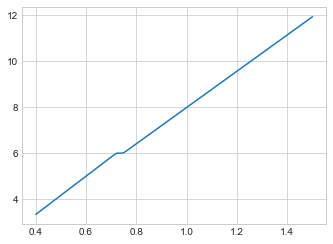

In [132]:
#Instead of creating a new dictionary at this point, I have addedd the reform-parameters to the SimpleNameSpace in the beginning of the assignment.
#Hence, these are denoted with "_reform". However, they are first taken in to use from this assignment. 
#Now we re-run the other question, but with the new tax reform:

# Define parameters:
#par = SimpleNamespace()
#par.phi = 0.3
#par.eta = 0.5
#par.r   = 0.03
#par.tg  = 0.012
#par.tp  = 0.004
#par.ph  = 3.0
#par.m   = 0.5
#par.eta_reform = 0.8
#par.tg_reform  = 0.01
#par.tp_reform  = 0.009
#par.ph_reform  = 8.0

#QUESTION 1 REFORMED

# Define Model
def utility_reform(c, h, par):
    return c**(1-par.phi)*h**par.phi

#Combined eq. (2) and (4)
def budget_reform(h, par):
    return par.r*h+par.tg_reform*h*par.eta_reform+par.tp_reform*max(h*par.eta_reform-par.ph_reform,0)

def objective_reform(h, par): 
    c=par.m-budget_reform(h, par)
    return -utility_reform(c, h, par)

# Solve
def solver_reform(par):   
    res = optimize.minimize_scalar(objective_reform,args=(par),bounds=None)
    
# Save solution for h and insert in consumption (which is also saved)
    h_star_reform = res.x
    c_star_reform = par.m-budget_reform(h_star_reform, par)
    return c_star_reform, h_star_reform

#Call the solved function to display the final result
solver_reform(par)

#QUESTION 2 REFORMED

#Creating the figure
fig = plt.figure(figsize=(12,4))

N = 100
m_vec_reform = np.linspace(0.4,1.5,N)
h_vec_reform = np.zeros(N)
c_vec_reform = np.zeros(N)

#Unpack solutions
for i,m in enumerate(m_vec_reform):
    par.m = m
    c,h=solver(par)
    h_vec_reform[i] = h
    c_vec_reform[i] = c

ax = fig.add_subplot(1,2,1)
ax.plot(m_vec_reform,h_vec_reform)

#QUESTION 3 REFORMED

#Now I define the parameters, genetate random numbers as specified with a log-normal distribution for cash-on-hand with mean -0.4 and std. dev. 0.35
#Furthermore, I introduce a new function for T
N = 10000
X = np.random.normal(loc=-0.4,scale=0.35,size=10000)
print(X)

print('set seed to 1 and create numbers:')
np.random.seed(1)
print(np.random.uniform(size=5))
print(np.random.uniform(size=5))

#Function for Tax revenue
def Tax_revenue(h_star, par):
    T=par.tg_reform*h_star*par.eta_reform+par.tp_reform*max(h_star*par.eta_reform-par.ph_reform,0)
    return T/N

def Find_Tax_revenue(h_star_reform, par):
    distr = Tax_revenue(h_star_reform, par)
    total = distr.sum()
    return distr, total

Find_Tax_revenue(h, par)


# Question 5

In order to implement the new reform, but without interfering with the tax burden, we take the average tax burden from assignment (3) is fixed and then we optimize for T^g (ultimately by offsetting any increase cause by the reform). 


In [150]:
#We can start by setting up the population, seed and distribution for cash-on-hand
N = 10000
X = np.random.normal(loc=-0.4,scale=0.35,size=10000)
print(X)

print('set seed to 1 and create numbers:')
np.random.seed(1)
print(np.random.uniform(size=5))
print(np.random.uniform(size=5))

#Now, we can define a new function for T^g and solve it
def Tg_reform(h_star, par):
    Tg=(Tax_revenue(h_star, par)-par.tp_reform*max(h_star*par.eta_reform-par.ph_reform,0))/(h_star*par.eta_reform)
    return Tg

def Fing_Tg_reform(h, par):
    distr = Tg_reform(h, par)
    total = distr.sum()
    return distr, total

Fing_Tg_reform(h, par)

[ 0.21068412 -0.66642242 -0.28833632 ... -0.6906937  -0.49138144
 -0.34072602]
set seed to 1 and create numbers:
[4.17022005e-01 7.20324493e-01 1.14374817e-04 3.02332573e-01
 1.46755891e-01]
[0.09233859 0.18626021 0.34556073 0.39676747 0.53881673]


(-0.0014591713807822245, -0.0014591713807822245)

# Conclusion

The model framework can be setup in code such that i simulated scenario allows for a clear solution to each problem that easily demonstrates the dynamics of the model. 
It is shown that the reforming the tax without concern for distortion in the average tax burden for each household yields a sub-optimal solution. However, the problem can be solved by ensuring no distortion in the tax burden by offsetting the parameter increases using T^g. 